<a href="https://colab.research.google.com/github/ndthanhthuyf11/BI6_DistributionCenterOptimizatioAndRFM/blob/main/T%E1%BB%91i_%C6%B0u_v%E1%BB%8B_tr%C3%AD_kho_h%C3%A0ng_%26_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librabries and loading data


In [ ]:
##import libraries

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install -q xlrd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from math import sqrt
from sklearn.preprocessing import StandardScaler

# Libraries in RFM model using  K-means clustering
import sklearn
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Libraries used in Distribution location
import folium
from folium.plugins import FastMarkerCluster
import random
import plotly.graph_objects as go
!pip install haversine
from haversine import haversine
import scipy.spatial
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load some dataframes

In [ ]:
#load data
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/BI6_TheArrow/Round3/Data/data_logistics_Tp.csv', encoding='utf-16', dtype={'Ma_Kho_Xuat_Hang': 'str'})
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Ma_Don_Hang,Ma_Dong_Don_Hang,Ma_Goi_Hang,Ngay_Dat_Hang,Ma_Khach_Hang,Ma_Loai_Hang,Tong_Tien_Dong_Don_Hang,Gia_San_Pham,Trang_Thai_Dong_Dat_Hang,Ngay_Trang_Thai,...,So_Luong_Goi_Hang,So_Luong_Goi_Hang_Dong,Ngay_Nhan_Hang,Noi_Den_Tinh_Thanh,Noi_Den_Thanh_Pho,Khoang_Cach_Van_Chuyen,Thoi_Gian_Van_Chuyen,Thoi_Gian_Dat_Xuat,Thoi_Gian_Xuat_Van,Thoi_Gian_Van_Nhan
0,648909604266,1,2895465364,2019-08-09,40510060,KPIM Ecommerce,53.15,49.98,VS,2019-08-11,...,1,1,2019-08-15,Bắc Giang,NaN,"1,207.01",6.00,2.00,0.00,4.00
1,648909611116,1,2895466445,2019-08-09,514018390,KPIM Ecommerce,"1,228,023.42","1,158,486.42",VS,2019-08-10,...,1,1,2019-08-12,Vĩnh Phúc,Tam Đảo,"1,218.09",3.00,1.00,0.00,2.00
2,648909634926,1,2895467557,2019-08-09,19785770,KPIM Ecommerce,"1,239,149.34","1,158,486.42",RT,2019-09-12,...,1,1,2019-08-13,Bắc Ninh,Chờ,"1,198.55",4.00,2.00,NaN,NaN
3,648909649846,1,2895469424,2019-08-09,629933270,KPIM Ecommerce,"1,228,023.42","1,158,486.42",VS,2019-08-11,...,1,1,2019-08-16,Nghệ An,Nam Đàn,928.16,7.00,2.00,0.00,5.00
4,648909654286,1,2895467915,2019-08-09,26851940,KPIM Ecommerce,"1,328,852.07","1,158,486.42",VS,2019-08-11,...,1,1,2019-08-15,Quảng Ninh,Cô Tô,552.71,6.00,2.00,0.00,4.00


In [ ]:
df_dist_center = pd.read_table('/content/drive/Shareddrives/BI6_TheArrow/Round3/Data/KPIM Ecommerce Distribution Center.txt', encoding = 'utf-16')
df_dist_center.head()

,Ma_Kho_Xuat_Hang,Thanh_Pho,Tinh,Mã Thành Phố
0,0111,Ba Đình,Hà Nội,1
1,0210,Ba Đình,Hà Nội,1
2,0401,Ba Đình,Hà Nội,1
3,0677,Ba Đình,Hà Nội,1
4,0739,Ba Đình,Hà Nội,1


In [ ]:
#load data of 63 provinces
df_geo_details = pd.read_excel('/content/drive/Shareddrives/BI6_TheArrow/Round3/Data/vn_613locations.xlsx')
df_geo_details.head(3)
#load long_lat_vietnam
# df_geo = pd.read_excel('/content/drive/Shareddrives/BI6_TheArrow/Round3/Data/vietnam.xlsx')
# df_geo.head(3)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Hồ Chí Minh,10.82,106.63,Vietnam,VN,Hồ Chí Minh,admin,"13,312,000.00","7,431,000.00"
1,Hà Nội,21.02,105.84,Vietnam,VN,Hà Nội,primary,"7,785,000.00","7,785,000.00"
2,Hải Phòng,20.80,106.67,Vietnam,VN,Hải Phòng,admin,"2,103,500.00","2,103,500.00"


In [ ]:
df_rfm_raw = pd.read_csv('/content/drive/Shareddrives/BI6_TheArrow/Round3/Data/ecommerce_rfm.csv')

#Preprocessing

##Drop unwanted columns

In [ ]:
# df.drop()

##Cleaning, missing values

In [ ]:
df.describe()

,Ma_Don_Hang,Ma_Dong_Don_Hang,Ma_Goi_Hang,Ma_Khach_Hang,Tong_Tien_Dong_Don_Hang,Gia_San_Pham,Ma_TT_Phan_Phoi,So_Luong_Huy,So_Luong_Dat,So_Luong_Xuat,So_Luong_Goi_Hang,So_Luong_Goi_Hang_Dong,Khoang_Cach_Van_Chuyen,Thoi_Gian_Van_Chuyen,Thoi_Gian_Dat_Xuat,Thoi_Gian_Xuat_Van,Thoi_Gian_Van_Nhan
count,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5530253.0,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5.530255e+06,5.274561e+06,5.511878e+06,3.919839e+06,3.872232e+06
mean,4.998050e+11,1.286314e+00,2.914535e+09,1.547939e+08,1.287440e+06,1.095421e+06,1.177078e+07,0.0,1.056214e+00,1.052956e+00,1.013928e+00,1.260869e+00,8.067329e+02,7.387999e+00,3.662978e+00,2.791867e-01,3.359316e+00
std,2.872534e+11,7.518660e-01,1.762405e+07,2.273672e+08,1.823094e+06,1.641395e+06,1.266660e+07,0.0,3.121974e-01,3.181884e-01,1.660008e-01,6.433987e-01,4.582234e+02,9.508608e+00,9.385084e+00,6.976087e+00,4.778482e+00
min,2.137114e+10,1.000000e+00,2.884360e+09,1.000400e+05,0.000000e+00,0.000000e+00,1.001280e+05,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,-1.700000e+01,-1.490000e+02,-3.710000e+02
25%,2.493129e+11,1.000000e+00,2.899381e+09,1.721643e+07,6.123892e+05,4.631164e+05,9.200002e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.059004e+02,5.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00
50%,4.703940e+11,1.000000e+00,2.914269e+09,3.450784e+07,9.565973e+05,7.880860e+05,1.010000e+07,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.050765e+03,6.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00
75%,7.493136e+11,1.000000e+00,2.929394e+09,1.329978e+08,1.508721e+06,1.319812e+06,1.510000e+07,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.183435e+03,7.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00
max,9.703971e+11,9.900000e+01,3.018353e+09,7.195002e+08,1.621798e+08,1.478588e+08,1.592000e+08,0.0,9.900000e+01,9.900000e+01,4.500000e+01,2.500000e+01,1.417992e+03,4.360000e+02,4.480000e+02,4.230000e+02,6.900000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530255 entries, 0 to 5530254
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ma_Don_Hang                int64  
 1   Ma_Dong_Don_Hang           int64  
 2   Ma_Goi_Hang                int64  
 3   Ngay_Dat_Hang              object 
 4   Ma_Khach_Hang              int64  
 5   Ma_Loai_Hang               object 
 6   Tong_Tien_Dong_Don_Hang    float64
 7   Gia_San_Pham               float64
 8   Trang_Thai_Dong_Dat_Hang   object 
 9   Ngay_Trang_Thai            object 
 10  Ngay_Xuat_Hang             object 
 11  Ma_Kho_Xuat_Hang           object 
 12  Tinh_Xuat_Hang             object 
 13  Ma_TT_Phan_Phoi            int64  
 14  So_Luong_Huy               float64
 15  So_Luong_Dat               int64  
 16  So_Luong_Xuat              int64  
 17  Loai_San_Pham              object 
 18  Ngay_Cap_Nhap_Chuyen_Phat  object 
 19  Ngay_Van_Chuyen            object 
 20  Ng

In [ ]:
df.isna().sum()

Ma_Don_Hang                        0
Ma_Dong_Don_Hang                   0
Ma_Goi_Hang                        0
Ngay_Dat_Hang                      0
Ma_Khach_Hang                      0
Ma_Loai_Hang                       0
Tong_Tien_Dong_Don_Hang            0
Gia_San_Pham                       0
Trang_Thai_Dong_Dat_Hang           0
Ngay_Trang_Thai                    0
Ngay_Xuat_Hang                 18377
Ma_Kho_Xuat_Hang                   0
Tinh_Xuat_Hang                     0
Ma_TT_Phan_Phoi                    0
So_Luong_Huy                       2
So_Luong_Dat                       0
So_Luong_Xuat                      0
Loai_San_Pham                      0
Ngay_Cap_Nhap_Chuyen_Phat       2841
Ngay_Van_Chuyen              1608463
Ngay_Hen_Giao_Hang           4206126
Ngay_Hen_Giao_Hang_Lai       2203225
Ngay_Quet_Cuoi_Cung            18607
So_Luong_Goi_Hang                  0
So_Luong_Goi_Hang_Dong             0
Ngay_Nhan_Hang                255694
Noi_Den_Tinh_Thanh                 0
N

In [ ]:
#remove rows with undesirable status
status_not_accepted = ['CX', 'BX', 'CP']
df = df[~df.Trang_Thai_Dong_Dat_Hang.isin(status_not_accepted)]

#remove rows whose Ngay_Nhan_Hang are null
df = df[~df.Ngay_Nhan_Hang.isna()]

#remove rows whose Noi_Den_Tinh_Thanh are null
df = df[~df.Noi_Den_Tinh_Thanh.isna()]

df.count()

Ma_Don_Hang                  5274560
Ma_Dong_Don_Hang             5274560
Ma_Goi_Hang                  5274560
Ngay_Dat_Hang                5274560
Ma_Khach_Hang                5274560
Ma_Loai_Hang                 5274560
Tong_Tien_Dong_Don_Hang      5274560
Gia_San_Pham                 5274560
Trang_Thai_Dong_Dat_Hang     5274560
Ngay_Trang_Thai              5274560
Ngay_Xuat_Hang               5274560
Ma_Kho_Xuat_Hang             5274560
Tinh_Xuat_Hang               5274560
Ma_TT_Phan_Phoi              5274560
So_Luong_Huy                 5274558
So_Luong_Dat                 5274560
So_Luong_Xuat                5274560
Loai_San_Pham                5274560
Ngay_Cap_Nhap_Chuyen_Phat    5274560
Ngay_Van_Chuyen              3872231
Ngay_Hen_Giao_Hang           1274054
Ngay_Hen_Giao_Hang_Lai       3289583
Ngay_Quet_Cuoi_Cung          5274560
So_Luong_Goi_Hang            5274560
So_Luong_Goi_Hang_Dong       5274560
Ngay_Nhan_Hang               5274560
Noi_Den_Tinh_Thanh           5274560
N

##Convert to datetime

In [ ]:
#convert string to datetime 
##assign all columns of date into a list
date_cols = ['Ngay_Dat_Hang','Ngay_Trang_Thai', 'Ngay_Van_Chuyen', 'Ngay_Xuat_Hang', 'Ngay_Nhan_Hang', 'Ngay_Cap_Nhap_Chuyen_Phat', 'Ngay_Hen_Giao_Hang', 'Ngay_Hen_Giao_Hang_Lai', 'Ngay_Quet_Cuoi_Cung']

##covert string to datetime
for x in date_cols:
  df[x] = pd.to_datetime(df[x])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274560 entries, 0 to 5530254
Data columns (total 33 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Ma_Don_Hang                int64         
 1   Ma_Dong_Don_Hang           int64         
 2   Ma_Goi_Hang                int64         
 3   Ngay_Dat_Hang              datetime64[ns]
 4   Ma_Khach_Hang              int64         
 5   Ma_Loai_Hang               object        
 6   Tong_Tien_Dong_Don_Hang    float64       
 7   Gia_San_Pham               float64       
 8   Trang_Thai_Dong_Dat_Hang   object        
 9   Ngay_Trang_Thai            datetime64[ns]
 10  Ngay_Xuat_Hang             datetime64[ns]
 11  Ma_Kho_Xuat_Hang           object        
 12  Tinh_Xuat_Hang             object        
 13  Ma_TT_Phan_Phoi            int64         
 14  So_Luong_Huy               float64       
 15  So_Luong_Dat               int64         
 16  So_Luong_Xuat              int64    

In [ ]:
df_rfm_raw['Ngay_Dat_Hang'] = pd.to_datetime(df_rfm_raw['Ngay_Dat_Hang'])

##Detecting outlier

In [ ]:
df = df[(stats.zscore(df['Thoi_Gian_Van_Chuyen']) < 3) & (stats.zscore(df['Thoi_Gian_Van_Chuyen']) > -3)]
#df.count('Ma_Don_Hang')

In [ ]:
df.count()

Ma_Don_Hang                  5200913
Ma_Dong_Don_Hang             5200913
Ma_Goi_Hang                  5200913
Ngay_Dat_Hang                5200913
Ma_Khach_Hang                5200913
Ma_Loai_Hang                 5200913
Tong_Tien_Dong_Don_Hang      5200913
Gia_San_Pham                 5200913
Trang_Thai_Dong_Dat_Hang     5200913
Ngay_Trang_Thai              5200913
Ngay_Xuat_Hang               5200913
Ma_Kho_Xuat_Hang             5200913
Tinh_Xuat_Hang               5200913
Ma_TT_Phan_Phoi              5200913
So_Luong_Huy                 5200911
So_Luong_Dat                 5200913
So_Luong_Xuat                5200913
Loai_San_Pham                5200913
Ngay_Cap_Nhap_Chuyen_Phat    5200913
Ngay_Van_Chuyen              3811929
Ngay_Hen_Giao_Hang           1239655
Ngay_Hen_Giao_Hang_Lai       3241325
Ngay_Quet_Cuoi_Cung          5200913
So_Luong_Goi_Hang            5200913
So_Luong_Goi_Hang_Dong       5200913
Ngay_Nhan_Hang               5200913
Noi_Den_Tinh_Thanh           5200913
N

There are a lot of missing values in Noi_Den_Thanh_Pho

--> Combine both Noi_Den_Tinh_Thanh and Noi_Den_Thanh_Pho to identidy demand based on locations

##Generate df for further manipulation

In [ ]:
df_products = df.groupby('Loai_San_Pham').agg({'Thoi_Gian_Van_Chuyen': 'mean', 'Ma_Don_Hang': 'nunique'})
df_products

,Thoi_Gian_Van_Chuyen,Ma_Don_Hang
Loai_San_Pham,,
Gia dụng,6.015934,371605
Giải trí,6.098595,61935
Khác,6.248008,114263
Mỹ phẩm,6.251065,745430
Nội thất,6.036231,190115
Phần mềm,6.196730,4863
Phụ kiện,6.655915,467380
Quần áo,6.466030,845043
Sưu tầm,7.242697,3783


In [ ]:
df_dist = df.groupby(['Noi_Den_Tinh_Thanh', 'Noi_Den_Thanh_Pho']).agg({'Thoi_Gian_Van_Chuyen': 'mean', 'Ma_Don_Hang': 'nunique'}).reset_index()
df.dist = df_dist.rename(columns={'Ma_Don_Hang':'Tong_So_Don_Hang'})
df_dist.head()

,Noi_Den_Tinh_Thanh,Noi_Den_Thanh_Pho,Thoi_Gian_Van_Chuyen,Ma_Don_Hang
0,An Giang,An Châu,7.12,9205
1,An Giang,An Phú,6.96,9012
2,An Giang,Châu Phong,6.95,9193
3,An Giang,Chợ Mới,6.95,9122
4,An Giang,Cái Dầu,6.87,9114


In [ ]:
##remove 'Thành Phố' if it is placed at the 1st position in Noi_Den_Thanh_Pho
for i, r in df_dist.iterrows():
  if (r['Noi_Den_Thanh_Pho'].find('Thành Phố') == 0) | (r['Noi_Den_Thanh_Pho'].find('Thành phố') == 0):
    df_dist.at[i, 'Noi_Den_Thanh_Pho'] = r['Noi_Den_Thanh_Pho'][10:]
    
    #print(r)

#df_dist['Noi_Den_Thanh_Pho'].head()

#Distribution locations with Weighted K-means

In [ ]:
df_dist_merge = df_dist.merge(df_geo_details[['lat', 'lng', 'city', 'admin_name']], how='inner', left_on=('Noi_Den_Thanh_Pho','Noi_Den_Tinh_Thanh'), right_on=('city', 'admin_name')).drop(columns = ['city', 'admin_name'])
df_dist_merge

,Noi_Den_Tinh_Thanh,Noi_Den_Thanh_Pho,Thoi_Gian_Van_Chuyen,Ma_Don_Hang,lat,lng
0,An Giang,An Châu,7.12,9205,10.45,105.39
1,An Giang,An Phú,6.96,9012,10.82,105.09
2,An Giang,Chợ Mới,6.95,9122,10.55,105.40
3,An Giang,Cái Dầu,6.87,9114,10.57,105.23
4,An Giang,Long Xuyên,7.06,9174,10.37,105.42
...,...,...,...,...,...,...
551,Đồng Tháp,Mỹ Thọ,12.40,144,10.44,105.70
552,Đồng Tháp,Sa Rài,12.41,142,10.87,105.47
553,Đồng Tháp,Sa Đéc,12.01,162,10.31,105.74
554,Đồng Tháp,Thanh Bình,14.39,143,10.56,105.48


In [ ]:
df_dist_merge.isna().sum()



Some cities can found latitude and longtitue --> Get lat,long of the admin_name

In [ ]:
df_dist_merge[df_dist_merge.isnull().any(axis=1)]

In [ ]:
df_dist_merge.describe()

,Thoi_Gian_Van_Chuyen,Ma_Don_Hang,lat,lng
count,552.00,556.00,556.00,556.00
mean,8.14,"8,160.62",16.98,106.43
std,1.91,"8,531.39",4.58,1.34
min,5.66,1.00,8.68,102.46
25%,7.04,"2,088.75",11.83,105.62
50%,7.63,"6,770.50",18.69,106.20
75%,8.72,"10,299.00",21.06,107.25
max,25.22,"46,217.00",23.28,109.31


In [ ]:
# Compute key parameters of MIP model formulation
#num_facilities = len(pd.unique(df['Ma_Kho_Xuat_Hang']))
#num_dests = len(pd.unique(df['Noi_Den_Tinh_Thanh']))

#cartesian_prod = list(product(range(num_dests), range(num_facilities)))
m = folium.Map(
    location=[10.762622, 106.660172],
    zoom_start=6,tiles='cartodbpositron')
folium.LayerControl().add_to(m)

for row in df_dist_merge.iterrows():
    row=row[1]
    folium.CircleMarker(location=(row["lat"],
                                  row["lng"]),
                        radius= row['Ma_Don_Hang']/7500,
                        color="#007849",
                        hover=row['Ma_Don_Hang'],
                        # popup=row['Ma_Don_Hang'],
                        fill=True, opacity = 0.4).add_to(m)


# save the map 
#m.save("save_file.html")
    
display(m)


##Find optimal numbers of cluster

###1st approach

In [ ]:
def distance(p1,p2):
  return haversine(p1[1:],p2[1:])

def cluster_centroids(data, clusters, k):
  results=[]
  for i in range(k):
    results.append(np.average(data[clusters == i], weights=np.squeeze(np.asarray(data[clusters == i][:,[0]])),axis=0))
  return results

def kmeanss(data, k=None, centroids=None, steps=30):
  # Forgy initialization method: choose k data points randomly.
  centroids = data[np.random.choice(np.arange(len(data)), k, False)]
  elbow = []
  for i in range(max(steps, 1)):
    sqdists = scipy.spatial.distance.cdist(centroids, data, lambda u, v: (distance(u,v)**2))
    elbow.append(sqdists)
    clusters = np.argmin(sqdists, axis=0)
    new_centroids = cluster_centroids(data, clusters, k)
    if np.array_equal(new_centroids, centroids):
      break
    centroids = new_centroids
  
  return clusters, centroids, elbow

In [ ]:
vals = df_dist_merge[['Ma_Don_Hang','lat','lng']].values
sse=[]
for k in range(1, 11):
    clusters, centroids, elbow = kmeanss(vals, k)
    sqdist = np.sum((elbow-np.mean(elbow))**2)
    sse.append(sqdist)
sse = sorted(sse, reverse=True)

In [ ]:
sse

[2.2396542089579784e+16,
 2.169502114010207e+16,
 2.0360951759128064e+16,
 1.2037050494565144e+16,
 8738988324345371.0,
 8497914488630823.0,
 5472520742007573.0,
 5344274818772787.0,
 1527127997268810.8,
 211015258907621.8]

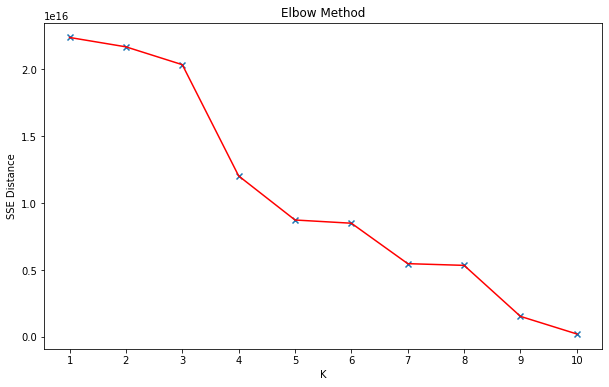

In [ ]:
fig = plt.figure(figsize=(10,6))
x=list(range(1,11))
labels=x
plt.plot(x,sse,'r')
plt.scatter(x,sse,marker='x')
plt.xticks(x, labels)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE Distance')
# plt.plot([4, 4], [0,1.0417261149971132e+19 ],color='green',
        #  linestyle='dashed',linewidth=2)  # plotting the arbitrary line from point (25,10) to (65,45).    
plt.show()

In [ ]:
k = 4
#run it
clusters,centroids,elbow=kmeanss(vals,k)
#output
df_dist_merge['c']=[int(c) for c in clusters]
lats = [centroids[i][1] for i in range(k)]
df_dist_merge['clat'] = df_dist_merge['c'].map(lambda x: lats[x])
longs = [centroids[i][2] for i in range(k)]
df_dist_merge['clong'] = df_dist_merge['c'].map(lambda x: longs[x])

df_dist_merge.head()
df_dist_merge

,Noi_Den_Tinh_Thanh,Noi_Den_Thanh_Pho,Thoi_Gian_Van_Chuyen,Ma_Don_Hang,lat,lng,c,clat,clong
0,An Giang,An Châu,6.182140,8740,10.4456,105.3862,2,10.608446,106.441280
1,An Giang,An Châu,6.182140,8740,21.3346,106.8493,1,20.729653,106.142176
2,Bắc Giang,An Châu,6.021017,7021,10.4456,105.3862,2,10.608446,106.441280
3,Bắc Giang,An Châu,6.021017,7021,21.3346,106.8493,1,20.729653,106.142176
4,An Giang,An Phú,6.144037,8576,10.8159,105.0904,2,10.608446,106.441280
...,...,...,...,...,...,...,...,...,...
573,Đồng Tháp,Mỹ Thọ,11.570312,128,10.4427,105.6951,2,10.608446,106.441280
574,Đồng Tháp,Sa Rài,11.842975,121,10.8702,105.4658,2,10.608446,106.441280
575,Đồng Tháp,Sa Đéc,11.842466,146,10.3105,105.7397,2,10.608446,106.441280
576,Đồng Tháp,Thanh Bình,12.496000,124,10.5619,105.4841,2,10.608446,106.441280


In [ ]:
df_dist_merge()

In [ ]:
c_lat=list(set(df_dist_merge['clat']))
c_long=list(set(df_dist_merge['clong']))
centroids=list(zip(c_lat,c_long))

In [ ]:
m2 = folium.Map(
    location=[10.762622, 106.660172],
    zoom_start=6, tiles='cartodbpositron')
for i in range(len(centroids)):
    folium.CircleMarker(centroids[i]).add_to(m2)
    
folium.LayerControl().add_to(m2)
m2

###2nd approach

In [ ]:
sse_list = [] #  sum of squared error
for k in range(1,11):
  kmeans = KMeans(k)
  kmeans.fit(df_dist_merge[['Ma_Don_Hang', 'lng', 'lat']])
  sse = kmeans.inertia_
  sse_list.append(sse)
sse_list 

[40395500232.88963,
 14925192513.254929,
 6347848718.138908,
 3051584041.711655,
 1651085899.4854324,
 1023346642.2859861,
 575294027.3367455,
 376020470.760682,
 271547523.42882943,
 168259442.80638668]

Text(0, 0.5, 'SSE')

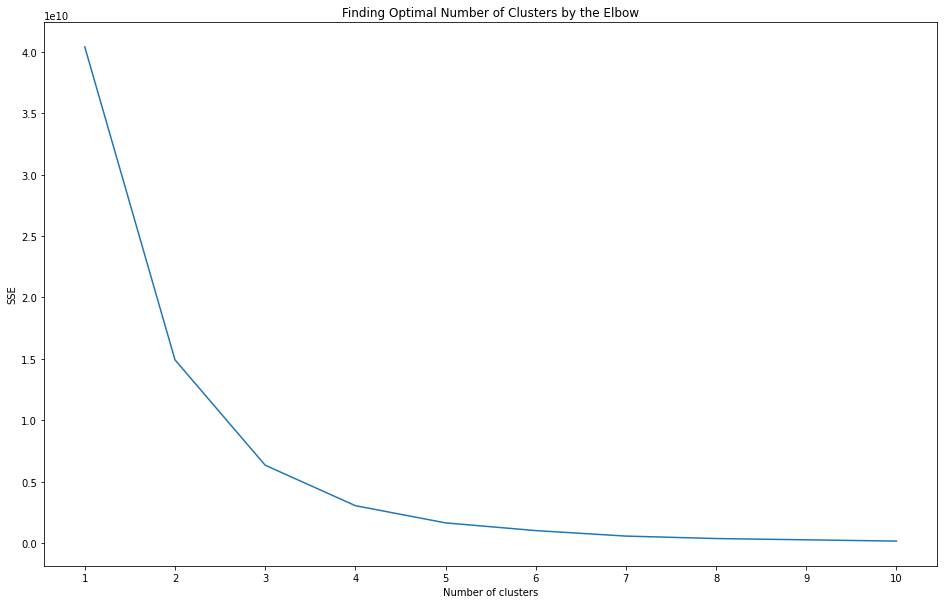

In [ ]:
number_clusters = range(1,11)
plt.rcParams["figure.figsize"] = (16,10)
plt.plot(number_clusters, sse_list)
plt.title('Finding Optimal Number of Clusters by the Elbow')
plt.xlabel('Number of clusters')
plt.xticks(number_clusters)
plt.ylabel('SSE')

####Fit clustering with 2nd approach

In [ ]:
km = KMeans(n_clusters=3, max_iter=500)
wt_kmeansclus = kmeans.fit(df_dist_merge[['lat', 'lng']],sample_weight = df_dist_merge['Ma_Don_Hang'])
predicted_kmeans = kmeans.predict(df_dist_merge[['lat', 'lng']], sample_weight = df_dist_merge['Ma_Don_Hang'])

In [ ]:
centers = wt_kmeansclus.cluster_centers_

In [ ]:
centers

array([[ 21.60928079, 103.81726267],
       [ 12.96613182, 108.61826205],
       [ 10.13537434, 105.57081235],
       [ 20.22615033, 105.74870762],
       [ 15.91709348, 107.95174182],
       [ 21.13675774, 105.84149764],
       [ 10.75974946, 106.85114287],
       [ 21.01856949, 106.83398783],
       [ 22.3375684 , 105.31110409],
       [ 18.69450608, 105.49674291]])

In [ ]:
#Storing results obtained together with respective city-state labels
kmeans_results = pd.DataFrame({"label": df_dist_merge['Noi_Den_Thanh_Pho'],"kmeans_cluster":predicted_kmeans+1})
kmeans_results

,label,kmeans_cluster
0,An Châu,3
1,An Phú,3
2,Chợ Mới,3
3,Cái Dầu,3
4,Long Xuyên,3
...,...,...
551,Mỹ Thọ,3
552,Sa Rài,3
553,Sa Đéc,3
554,Thanh Bình,3


In [ ]:
print(kmeans_results.kmeans_cluster.value_counts())

7     92
6     84
2     66
4     62
5     60
9     51
3     42
8     35
1     33
10    31
Name: kmeans_cluster, dtype: int64


In [ ]:
centersdf=pd.DataFrame(centers)
centersdf['ClusterID'] = centersdf.index + 1
centersdf

,0,1,ClusterID
0,21.61,103.82,1
1,12.97,108.62,2
2,10.14,105.57,3
3,20.23,105.75,4
4,15.92,107.95,5
5,21.14,105.84,6
6,10.76,106.85,7
7,21.02,106.83,8
8,22.34,105.31,9
9,18.69,105.50,10


##Get recommended locations

###Get specified locations from latitude, longtitude

In [ ]:
from geopy.geocoders import Nominatim
locations = []
for i, r in centersdf.iterrows():
  geolocator = Nominatim(user_agent="geoapiExercises")

  Latitude = str(r[0])
  Longitude = str(r[1])
  # centersdf.at[i, 'location'] = geolocator.reverse(Latitude + ","+ Longitude)
  location = geolocator.reverse(Latitude + ","+ Longitude)
  location = location.raw['address']
  location = location.get('county', '') + " " + location.get('city', '') + ", " + location.get('state', '')
  locations.append(location)

# location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
centersdf['location'] = np.array(locations, dtype=object)

In [ ]:
centersdf

,0,1,ClusterID,location
0,21.61,103.82,1,"Mường La , Tỉnh Sơn La"
1,12.97,108.62,2,"Ea Kar , Đắk Lắk"
2,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
3,20.23,105.75,4,"Nho Quan , Tỉnh Ninh Bình"
4,15.92,107.95,5,"Đại Lộc , Tỉnh Quảng Nam"
5,21.14,105.84,6,"Thành phố Hà Nội,"
6,10.76,106.85,7,"Huyện Nhơn Trạch Xã Long Tân, Tỉnh Đồng Nai"
7,21.02,106.83,8,"Quảng Yên ,"
8,22.34,105.31,9,"Lâm Bình , Tỉnh Tuyên Quang"
9,18.69,105.50,10,"Nam Đàn , Tỉnh Nghệ An"


In [ ]:
kmeans_results = kmeans_results.merge(centersdf, how='inner', left_on='kmeans_cluster', right_on='ClusterID').drop(columns = ['kmeans_cluster'])
kmeans_results = kmeans_results.rename(columns = {0:'clat',1:'clong'})
kmeans_results

,label,clat,clong,ClusterID,location
0,An Châu,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
1,An Phú,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
2,Chợ Mới,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
3,Cái Dầu,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
4,Long Xuyên,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
...,...,...,...,...,...
551,Mường Ảng,21.61,103.82,1,"Mường La , Tỉnh Sơn La"
552,Thị Trấn Tuần Giáo,21.61,103.82,1,"Mường La , Tỉnh Sơn La"
553,Thị Trấn Tủa Chùa,21.61,103.82,1,"Mường La , Tỉnh Sơn La"
554,Điện Biên Phủ,21.61,103.82,1,"Mường La , Tỉnh Sơn La"


In [ ]:
df_dist_merge = df_dist_merge.merge(kmeans_results, right_on='label', left_on='Noi_Den_Thanh_Pho',how='inner')
df_dist_merge.head()

,Noi_Den_Tinh_Thanh,Noi_Den_Thanh_Pho,Thoi_Gian_Van_Chuyen,Ma_Don_Hang,lat,lng,label,clat,clong,ClusterID,location
0,An Giang,An Châu,7.12,9205,10.45,105.39,An Châu,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
1,An Giang,An Châu,7.12,9205,10.45,105.39,An Châu,21.02,106.83,8,"Quảng Yên ,"
2,Bắc Giang,An Châu,6.93,7424,21.33,106.85,An Châu,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"
3,Bắc Giang,An Châu,6.93,7424,21.33,106.85,An Châu,21.02,106.83,8,"Quảng Yên ,"
4,An Giang,An Phú,6.96,9012,10.82,105.09,An Phú,10.14,105.57,3,"Huyện Cờ Đỏ Xã Thới Hưng, Thành phố Cần Thơ"


In [ ]:
c_lat=list(set(df_dist_merge['clat']))
c_long=list(set(df_dist_merge['clong']))
centroids=list(zip(c_lat,c_long))
centroids

[(10.1353743446655, 103.8172626668526),
 (10.759749457833514, 105.57081234641451),
 (12.966131824208063, 106.83398782914553),
 (15.917093477321622, 105.31110409433947),
 (18.69450607507627, 108.61826205114102),
 (20.226150334661703, 106.85114286722761),
 (21.018569486097654, 107.951741821486),
 (22.33756840305288, 105.84149764036907),
 (21.13675773938561, 105.74870762295406),
 (21.609280786947256, 105.49674291111508)]

###Plot locations on the map

In [ ]:
m2 = folium.Map(
    location=[10.762622, 106.660172],
    zoom_start=6, tiles='cartodbpositron')
for i in range(len(centroids)):
    folium.CircleMarker(centroids[i]).add_to(m2)
    
folium.LayerControl().add_to(m2)
m2

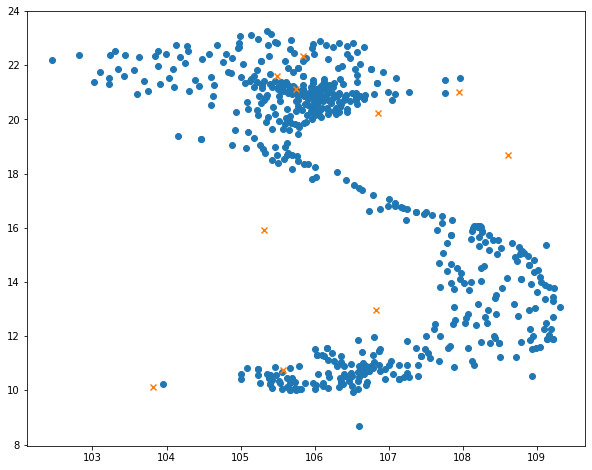

In [ ]:
x1=df_dist_merge['lat'].values.tolist()
y1=df_dist_merge['lng'].values.tolist()
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(y1,x1)
plt.scatter(c_long,c_lat,marker='x')

####The map

In [ ]:
m3 = folium.Map(
    location=[10.762622, 106.660172],
    zoom_start=6,tiles='cartodbpositron')
folium.LayerControl().add_to(m3)

for _, row in df_dist_merge.iterrows():
    # Flow lines
    folium.PolyLine([(row['lat'],
                          row['lng']),
                         (row['clat'],
                          row['clong'])],
                        color='grey',
                        weight=(row['Ma_Don_Hang']/7500),
                        opacity=0.8).add_to(m3)
                        
# Add centers of gravity to map
for _, row in df_dist_merge.iterrows():
    # New centers of gravity
    folium.CircleMarker(location=[row['clat'],
                                  row['clong']],
                        # radius=(row['Volume']**0.5),
                        color='red',
                        tooltip=row['location']).add_to(m3)

folium.LayerControl().add_to(m3)
m3

#RFM segmentation

##Calculate RFM values

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df_rfm_raw.head()

,Ma_Don_Hang,Ma_Khach_Hang,Ngay_Dat_Hang,Tong_Tien_Don_Hang
0,49488790210,514122050,2019-12-30,"528,504.00"
1,550346987365,521702490,2019-12-19,"1,804,253.36"
2,48804926300,35740440,2019-07-05,"1,244,302.40"
3,49073032050,646421760,2019-08-20,"4,398,447.04"
4,50145249350,446740,2019-10-25,"764,907.00"


In [ ]:
df_rfm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921990 entries, 0 to 3921989
Data columns (total 4 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Ma_Don_Hang         int64         
 1   Ma_Khach_Hang       int64         
 2   Ngay_Dat_Hang       datetime64[ns]
 3   Tong_Tien_Don_Hang  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 119.7 MB


In [ ]:
# Calculate RFM
snapshot_date = df_rfm_raw['Ngay_Dat_Hang'].max() + dt.timedelta(days=1) 
df_rfm = df_rfm_raw.groupby(['Ma_Khach_Hang']).agg({'Ngay_Dat_Hang': lambda x: (snapshot_date - x.max()).days,
                                      'Ma_Don_Hang': 'count',
                                      'Tong_Tien_Don_Hang': 'sum'})
# Rename columns
df_rfm = df_rfm.rename(columns = {'Ngay_Dat_Hang': 'R',
                         'Ma_Don_Hang': 'F',
                         'Tong_Tien_Don_Hang': 'M'})
df_rfm.head()

,R,F,M
Ma_Khach_Hang,,,
100040,21,12,"15,364,283.38"
100230,28,10,"13,892,876.62"
100620,37,3,"3,855,131.28"
101180,78,2,"2,076,374.82"
101250,21,1,"27,213,768.53"


In [ ]:
df_rfm.describe(percentiles=[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])

,R,F,M
count,"475,350","475,350","475,350"
mean,51,8,"12,533,833"
std,47,18,"26,741,162"
min,1,1,0
1%,1,1,"552,124"
2%,1,1,"617,952"
5%,3,1,"786,266"
10%,6,1,"1,072,956"
25%,16,1,"1,964,188"
50%,34,3,"4,789,709"


In [ ]:
features = ['R', 'F', 'M']

In [ ]:
def plotBoxplot(feats, df):
  fig, axs = plt.subplots(1, 3)
  i = 0
  for i in range(3):
    plt.rcParams['figure.figsize'] = [18, 6]
    axs[i].boxplot(df[feats[i]])
    axs[i].set_title('Distribution of '+ feats[i])
    i +=1
  plt.show()

##Outlier detection

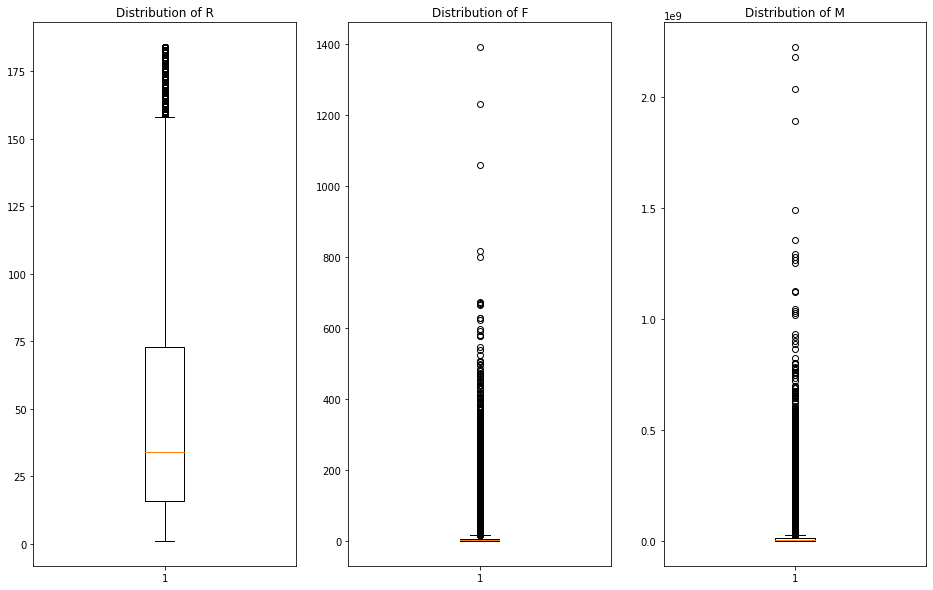

In [ ]:
plotBoxplot(features, df_rfm)

In [ ]:
print('Observations considered as outliers in R \n {}'.format(df_rfm[(stats.zscore(df_rfm['R']) > 3) | (stats.zscore(df_rfm['R']) < -3)].count()))
print('----\nObservations considered as outliers in F \n {}'.format(df_rfm[(stats.zscore(df_rfm['F']) > 3) | (stats.zscore(df_rfm['F']) < -3)].count()))
print('----\nObservations considered as outliers in M \n {}'.format(df_rfm[(stats.zscore(df_rfm['M']) > 3) | (stats.zscore(df_rfm['M']) < -3)].count()))

Observations considered as outliers in R 
 R    0
F    0
M    0
dtype: int64
----
Observations considered as outliers in F 
 R    8242
F    8242
M    8242
dtype: int64
----
Observations considered as outliers in M 
 R    7439
F    7439
M    7439
dtype: int64


In [ ]:
#remove outliers
df_rfm = df_rfm[(stats.zscore(df_rfm['F']) <= 3) & (stats.zscore(df_rfm['F']) >= -3)]
df_rfm = df_rfm[(stats.zscore(df_rfm['M']) <= 3) & (stats.zscore(df_rfm['M']) >= -3)]
df_rfm.describe()

,R,F,M
count,"455,349.00","455,349.00","455,349.00"
mean,53.24,5.53,"8,569,355.05"
std,47.46,7.42,"10,097,835.34"
min,1.00,1.00,0.00
25%,18.00,1.00,"1,901,605.16"
50%,35.00,2.00,"4,431,424.92"
75%,76.00,6.00,"11,129,165.06"
max,184.00,63.00,"53,086,698.88"


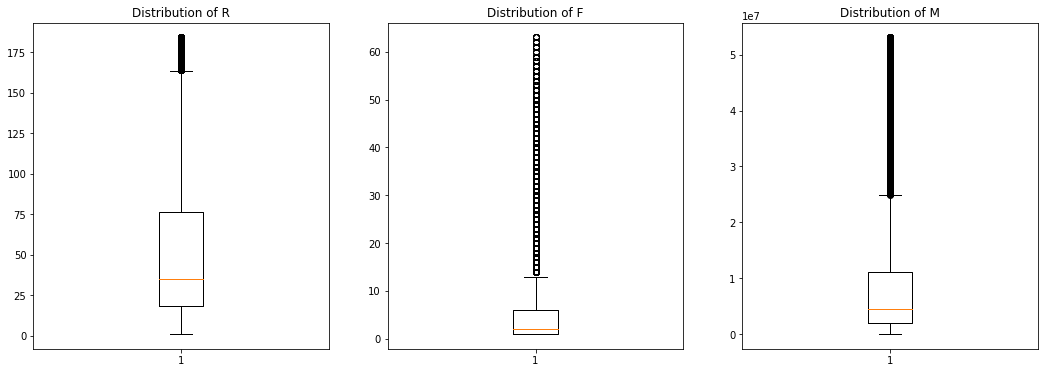

In [ ]:
#check distribution of these 3 values
plotBoxplot(features, df_rfm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

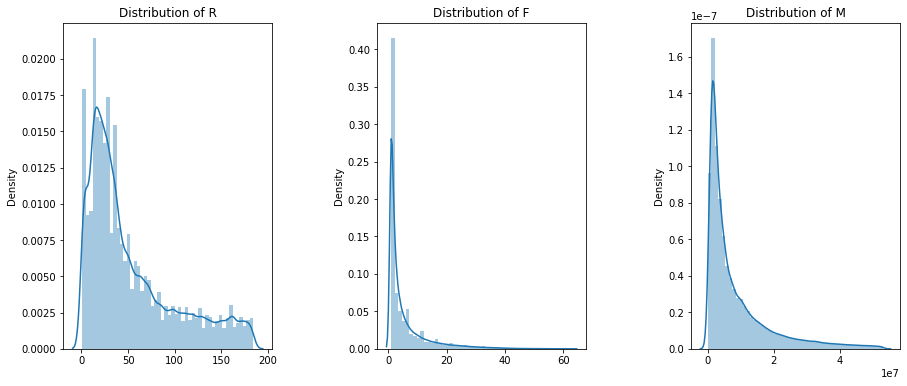

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in features:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sb.distplot(x= df_rfm[x])
    plt.title('Distribution of {}'.format(x))
plt.show()

In [ ]:
#log transformation
df_rfm['sqrt_R']= np.sqrt(df_rfm['R'])
df_rfm['sqrt_F']= np.sqrt(df_rfm['F'])
df_rfm['sqrt_M']= np.sqrt(df_rfm['M'])

#initiate scaler
scaler = StandardScaler()

# fit_transform
df_rfm['scaled_R'] = scaler.fit_transform(df_rfm[['R']])
df_rfm['scaled_F'] = scaler.fit_transform(df_rfm[['F']])
df_rfm['scaled_M'] = scaler.fit_transform(df_rfm[['M']])

In [ ]:
df_rfm = df_rfm.rename(columns = {'sqrt_R': 'tf_R',
                         'sqrt_F': 'tf_F',
                         'sqrt_M': 'tf_M'})

In [ ]:
df_rfm.describe()

,R,F,M,tf_R,tf_F,tf_M,scaled_R,scaled_F,scaled_M
count,"455,349.00","455,349.00","455,349.00","455,349.00","455,349.00","455,349.00","455,349.00","455,349.00","455,349.00"
mean,53.24,5.53,"8,569,355.05",6.57,2.01,"2,528.87",-0.00,-0.00,0.00
std,47.46,7.42,"10,097,835.34",3.17,1.23,"1,474.50",1.00,1.00,1.00
min,1.00,1.00,0.00,1.00,1.00,0.00,-1.10,-0.61,-0.85
25%,18.00,1.00,"1,901,605.16",4.24,1.00,"1,378.99",-0.74,-0.61,-0.66
50%,35.00,2.00,"4,431,424.92",5.92,1.41,"2,105.09",-0.38,-0.48,-0.41
75%,76.00,6.00,"11,129,165.06",8.72,2.45,"3,336.04",0.48,0.06,0.25
max,184.00,63.00,"53,086,698.88",13.56,7.94,"7,286.06",2.75,7.74,4.41


In [ ]:
features_scaled = ['scaled_R', 'scaled_F', 'scaled_M']
features_tf = ['tf_R', 'tf_F', 'tf_M']

##Clustering

###Find optimal k using Elbow method

In [ ]:
sse_list = [] #  sum of squared error
for k in range (2,11):
  kmeans = KMeans(k)
  kmeans.fit(df_rfm[features_tf])
  sse = kmeans.inertia_
  sse_list.append(sse)
sse_list

[289339895359.61066,
 133811853637.38988,
 77413857080.2872,
 50236773608.755936,
 35984900062.5977,
 26636303779.79248,
 20453952564.4437,
 16177551787.385626,
 13251958897.653767]

Text(0, 0.5, 'SSE')

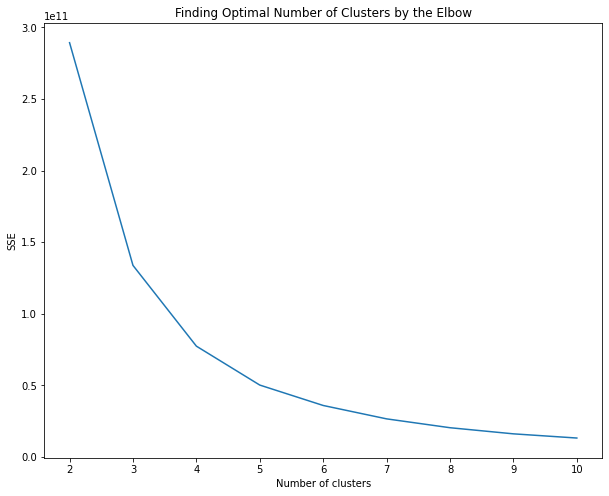

In [ ]:
number_clusters = range(2,11)
plt.figure(figsize = (10, 8))
plt.plot(number_clusters, sse_list)
plt.title('Finding Optimal Number of Clusters by the Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')



###Fit cluster witk k = 4


In [ ]:
rfm_kmeans = KMeans(n_clusters = 4, max_iter=300)
y_pred = rfm_kmeans.fit_predict(df_rfm[features_tf])

df_rfm['cluster'] = y_pred

In [ ]:
df_rfm['cluster'].value_counts()

0    188462
3    133162
2     89647
1     44078
Name: cluster, dtype: int64

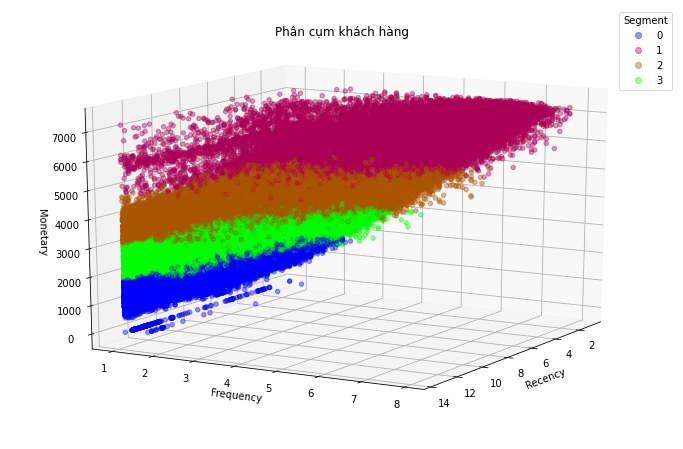

In [ ]:
#plotting the results:
# Creating figure
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection ="3d")

scatter = ax.scatter(df_rfm.tf_R, df_rfm.tf_F, df_rfm.tf_M, c = y_pred, cmap='brg', alpha=0.4)
# ax.scatter(centroids[:,0] , centroids[:,1] , centroids[:,2], s = 100, color = 'k')
plt.legend(handles = scatter.legend_elements()[0], labels=[0,1,2,3], title="Segment")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.view_init(15, 30)
plt.title("Phân cụm khách hàng")
plt.show()

##Cluster analysis

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


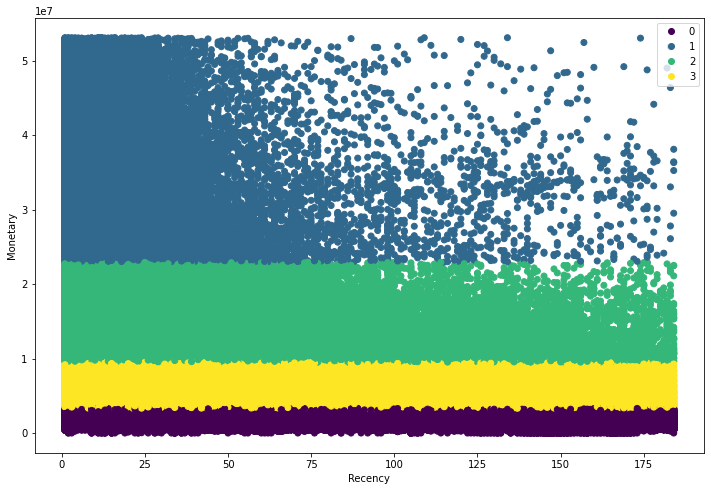

In [ ]:
plt.figure(figsize = (12, 8))
sct_rm = plt.scatter(df_rfm['R'], df_rfm['M'], c = y_pred, marker = 'o')
plt.legend(handles = sct_rm.legend_elements()[0], labels=[0,1,2,3])
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

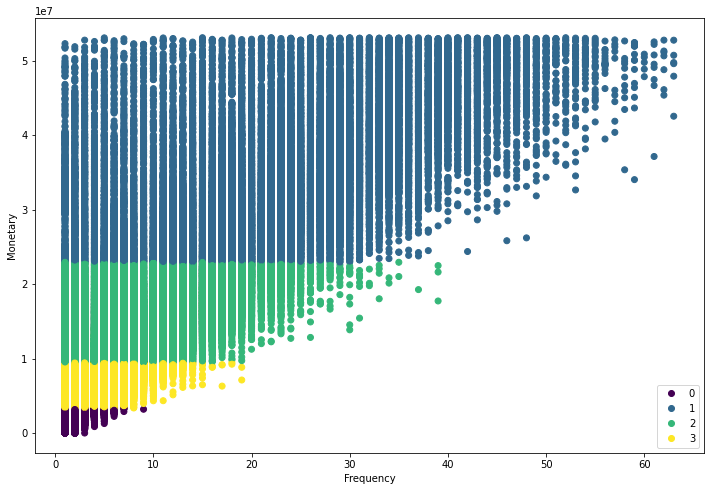

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(df_rfm['F'], df_rfm['M'], c = y_pred, marker = 'o')
plt.legend(handles = sct_rm.legend_elements()[0], labels=[0,1,2,3])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

* Cluster 0: Strangers
* Cluster 1: True friends
* Cluster 2: Butterflies
* Cluster 3: Barnacles



In [ ]:
df_rfm = df_rfm.assign(
    segt_name = lambda dataframe: dataframe['cluster'].map(lambda cluster: 'Stranger' if cluster == 0 
                                                           else 'True friend' if cluster == 1
                                                           else 'Butterfly' if cluster == 2
                                                           else 'Barnacles') 
)

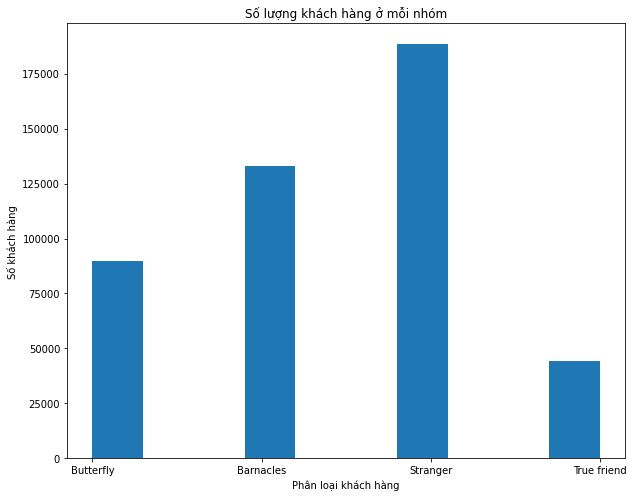

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df_rfm['segt_name'])
# df_rfm.pivot(columns='scaled_R', values='cluster').plot.hist()
plt.title('Số lượng khách hàng ở mỗi nhóm')
plt.xlabel('Phân loại khách hàng')
plt.ylabel('Số khách hàng')
plt.show()